#Churn Prediction

##I. Dataset Review and Preparation

In [ ]:
#  Wrangling Libraries
import numpy as np
import pandas as pd

# Visualization Libraries 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Widening Columns and Rows for Display
pd.options.display.max_rows = 30
pd.options.display.max_columns = 20

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

df = pd.read_csv('/content/drive/MyDrive/Assets/Churn_Modelling.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
#Checking if any missing value
df.isnull()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#checking column list
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#Finding uniqueness of each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
#Checking Numerical-only Statistical Descriptions in the Dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#Checking Categorical Statistical Descriptions in the Dataset
df.describe(include = 'object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [ ]:
#Checking Types in Dataset
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

##II. Features vs Target

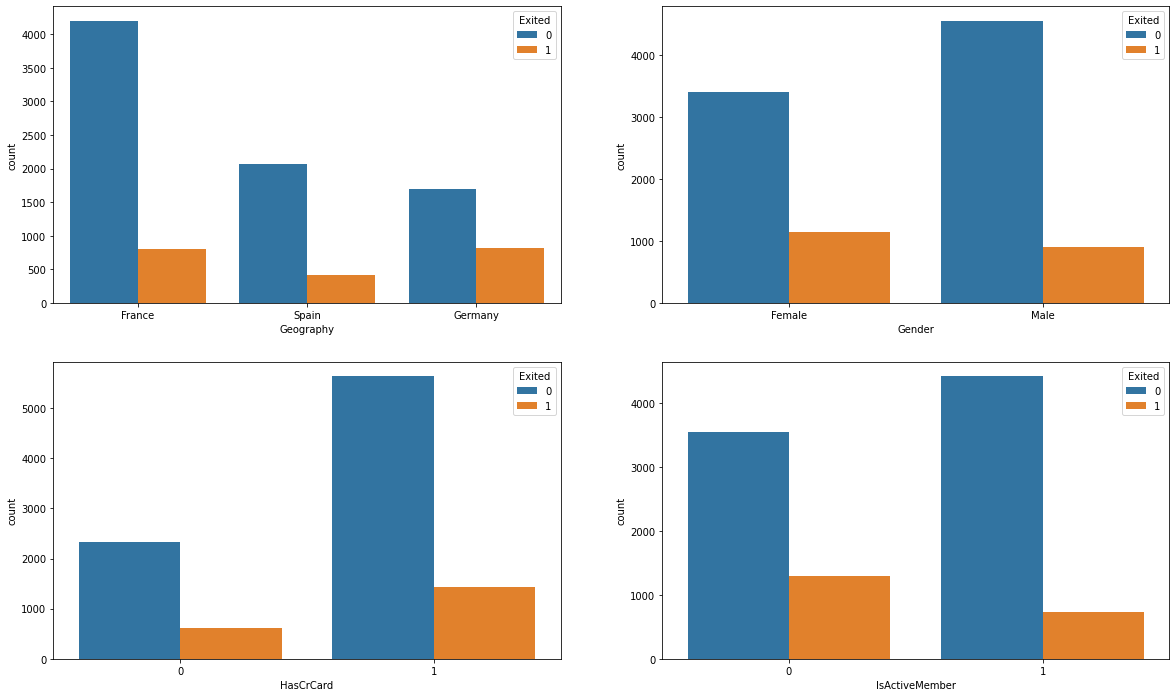

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited' , data = df, ax=axarr[0] [0])
sns.countplot(x='Gender', hue = 'Exited' , data = df, ax=axarr[0] [1])
sns.countplot(x='HasCrCard', hue = 'Exited' , data = df, ax=axarr[1] [0])
sns.countplot(x='IsActiveMember', hue = 'Exited' , data = df, ax=axarr[1] [1])

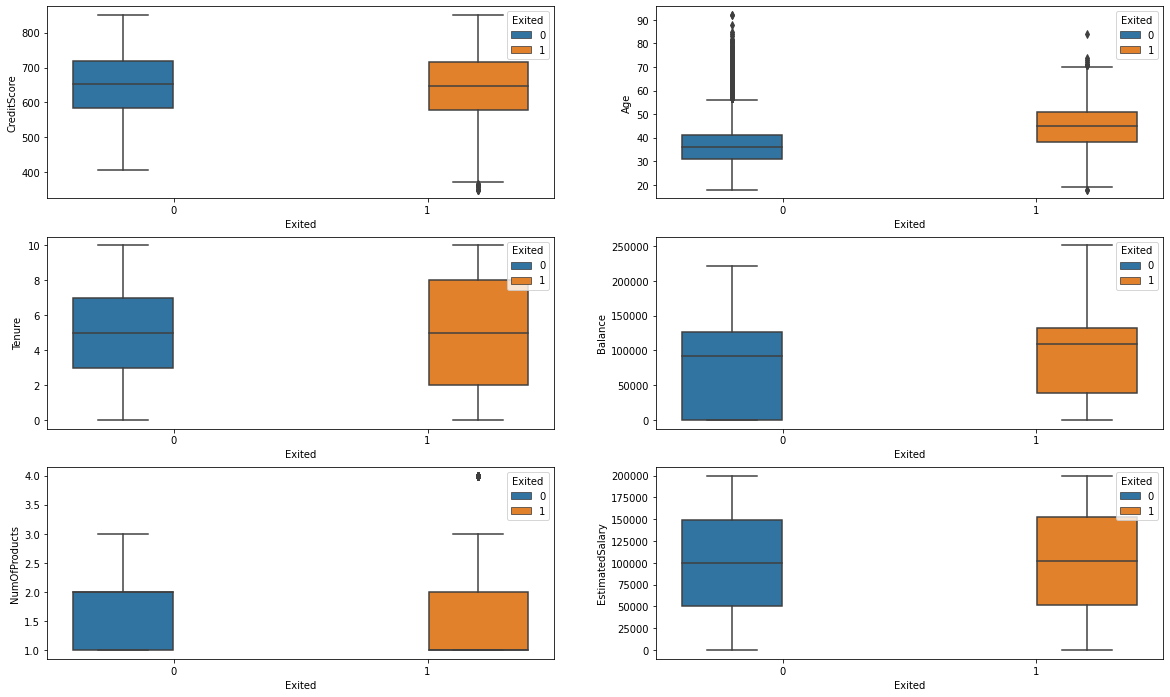

In [ ]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore', x = 'Exited', hue = 'Exited' , data = df, ax=axarr[0] [0])
sns.boxplot(y='Age', x = 'Exited', hue = 'Exited' , data = df, ax=axarr[0] [1])
sns.boxplot(y='Tenure', x = 'Exited', hue = 'Exited' , data = df, ax=axarr[1] [0])
sns.boxplot(y='Balance', x = 'Exited', hue = 'Exited' , data = df, ax=axarr[1] [1])
sns.boxplot(y='NumOfProducts', x = 'Exited', hue = 'Exited' , data = df, ax=axarr[2] [0])
sns.boxplot(y='EstimatedSalary', x = 'Exited', hue = 'Exited' , data = df, ax=axarr[2] [1])

##III. Correlation Matrix

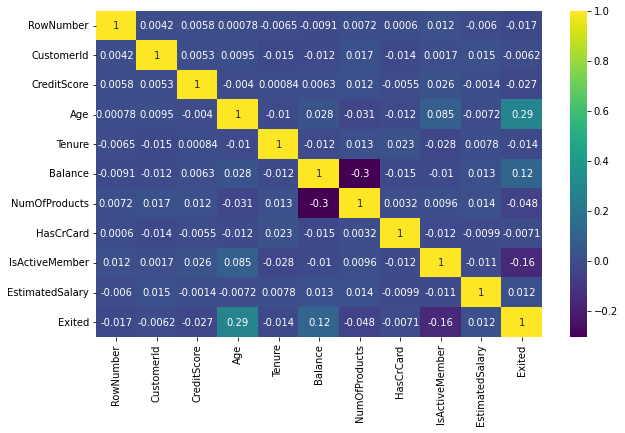

In [ ]:
#Correlation Matrix for "Exited" variable
cm = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

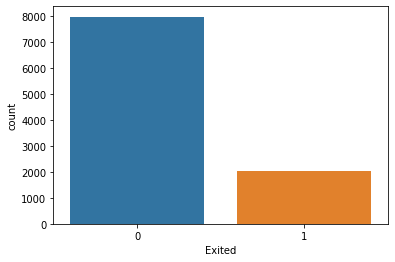

In [ ]:
sns.countplot(x='Exited', data = df)

##IV. Feature Engineering

Adding Features that have likelihood of affecting Churning probability. Split the train and test sets first.

In [ ]:
df = df.drop(['CustomerId', 'Surname'], axis = 1)

df_fe = df.copy()

In [ ]:
# 1st Additional Feature: Balance to Salary Ratio
df_fe['BalanceSalaryRatio'] = df_fe['Balance']/df_fe['EstimatedSalary']

#2nd Additional Feature: Standardizing Tenure since it's a function of Age
df_fe['TenureByAge'] = df_fe['Tenure']/(df_fe['Age'])

#3rd Credit behavior with regards to adult life
df_fe['CreditScoreGivenAge'] = df_fe['CreditScore']/(df_fe['Age'])

In [ ]:
#Dataframe with Recently-made Features
df_fe.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


##V. Data Preparation for Model Fitting

In [ ]:
# One-hot encoding for Categorical Variables

from sklearn.preprocessing import OneHotEncoder
lst = ['Geography', 'Gender']
ohe = OneHotEncoder()
ohe.fit(df_fe[lst])
df_ohe_res = pd.DataFrame(ohe.transform(df_fe[lst]).toarray(),
                                                columns = ohe.get_feature_names_out())
df_fe = pd.concat([df_fe, df_ohe_res], axis=1)
df_fe.drop(columns=lst, inplace=True)
df_fe.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1.0,0.0,0.0,1.0,0.0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268,0.0,0.0,1.0,1.0,0.0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381,1.0,0.0,0.0,1.0,0.0
3,4,699,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077,1.0,0.0,0.0,1.0,0.0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,0.0,0.0,1.0,1.0,0.0


In [ ]:
# minMax Scaling Continuous Variables

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(df_fe)
df_fe = pd.DataFrame(mm.transform(df_fe), columns=df_fe.columns)

df_fe.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.0000,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.000000,0.085714,0.235083,1.0,0.0,0.0,1.0,0.0
1,0.0001,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.000070,0.043902,0.237252,0.0,0.0,1.0,1.0,0.0
2,0.0002,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.000132,0.342857,0.168807,1.0,0.0,0.0,1.0,0.0
3,0.0003,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.000000,0.046154,0.310859,1.0,0.0,0.0,1.0,0.0
4,0.0004,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.000150,0.083721,0.354739,0.0,0.0,1.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

x = df_fe.drop(columns=['Exited']).copy()
y =df_fe['Exited'].copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(len(x_train))
print(len(x_test))

7500
2500


##VI. Model Fitting and Selection

Logistics Regression, KNN and Ensemble Models will be used for Model Fitting

In [ ]:
# Fitting Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Scoring Functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

###Fitting the Best Models

In [ ]:
#Fitting Logistics Regression
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#Fitting KNN
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# Fitting Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

###Reviewing the Best Model to Fit Accuracy

In [ ]:
y_pred_log = log.predict(x_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2003
           1       0.43      0.09      0.15       497

    accuracy                           0.79      2500
   macro avg       0.62      0.53      0.52      2500
weighted avg       0.73      0.79      0.74      2500



In [ ]:
y_pred_knn = knn.predict(x_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2003
           1       0.23      0.08      0.12       497

    accuracy                           0.76      2500
   macro avg       0.52      0.51      0.49      2500
weighted avg       0.69      0.76      0.72      2500



In [ ]:
y_pred_rf = rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.78      0.48      0.59       497

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.76      2500
weighted avg       0.86      0.87      0.86      2500



In [ ]:
def get_auc_scores(y_actual, y_pred, y_proba):
      auc_score = roc_auc_score(y_actual, y_pred);
      fpr_df, tpr_df, _ = roc_curve(y_actual, y_proba);
      return (auc_score, fpr_df, tpr_df)

In [ ]:
auc_log, fpr_log, tpr_log = get_auc_scores(y, 
                                           log.predict(x), 
                                           log.predict_proba(x)[:, 1])
auc_knn, fpr_knn, tpr_knn = get_auc_scores(y, 
                                           knn.predict(x), 
                                           knn.predict_proba(x)[:,1])
auc_rf, fpr_rf, tpr_rf = get_auc_scores(y, 
                                        rf.predict(x),
                                        rf.predict_proba(x)[:, 1])

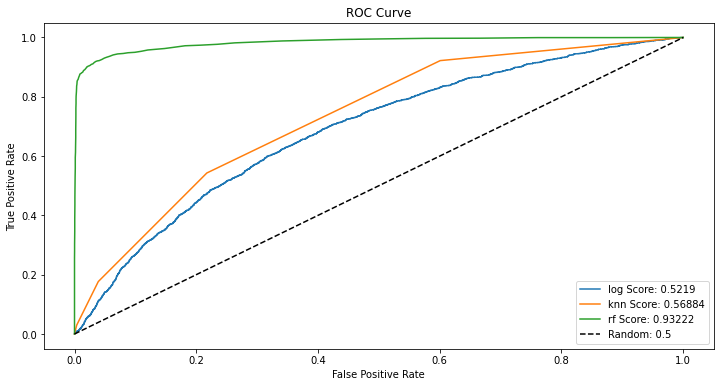

In [ ]:
plt.figure(figsize = (12,6), linewidth = 1)
plt.plot(fpr_log, tpr_log, label = 'log Score: ' + str(round(auc_log, 5)))
plt.plot(fpr_knn, tpr_knn, label = 'knn Score: ' + str(round(auc_knn, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'rf Score: ' + str(round(auc_rf, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

###Handling Imbalance Dataset with Resampling

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(x_train, y_train)

In [ ]:
y_train.value_counts()

0    5960
1    1540
Name: Exited, dtype: int64

In [ ]:
y_smote.value_counts()

1    5960
0    5960
Name: Exited, dtype: int64

In [ ]:
#Fitting RF Classifier
rf_smote = RandomForestClassifier()
rf_smote.fit(x_smote, y_smote)

RandomForestClassifier()

In [ ]:
y_pred_smote = rf_smote.predict(x_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2003
           1       0.68      0.56      0.61       497

    accuracy                           0.86      2500
   macro avg       0.79      0.75      0.76      2500
weighted avg       0.85      0.86      0.85      2500



###Feature Importance

<BarContainer object of 17 artists>

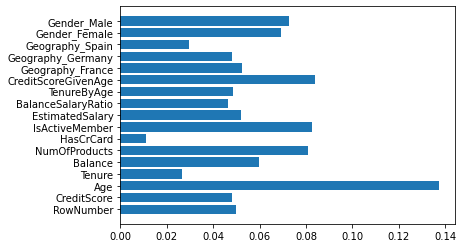

In [ ]:
fi =rf_smote.feature_importances_
col = x_train.columns
plt.barh(col, fi)

In [ ]:
df.groupby('Exited')['Age'].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

In [ ]:
pd.crosstab(df['NumOfProducts'], df['Exited'])

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60
